In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#  Aufgabe 2

In [2]:
omega = np.array([640, 583, 537, 497, 460, 432, 395])*2*np.pi/60
d_omega = np.ones(7)*6*np.pi/60
time = np.arange(7)*120
d_time = np.ones(7)*5

<ErrorbarContainer object of 3 artists>

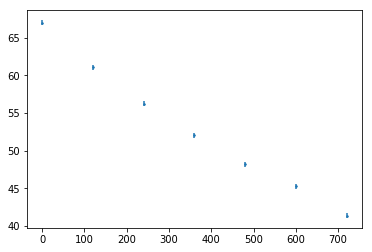

In [3]:
plt.errorbar(time, omega, yerr=d_omega, fmt='.', ms = 3)

In [4]:
def dämpfung(t, d, A0):
    return A0*np.exp(-d*t)


Dämpfungskonstante d =  0.0006614638435187272  +-  1.4245960502678709e-05
Halbwertszeit =  1047.8988191896856  +-  22.568618580219148


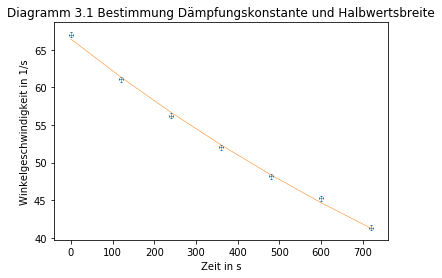

In [5]:
popt, pcov = curve_fit(dämpfung, time, omega, p0 = (0.001, 70) )

hwz = -np.log(1/2)/popt[0]
d_hwz = np.sqrt((np.log(1/2)*np.sqrt(pcov[0][0])/popt[0]**2)**2)

plt.errorbar(time, omega, yerr=d_omega, xerr=d_time, fmt='.', ms =0.5, elinewidth = 0.5, capthick =1, capsize =1)
plt.plot(time, dämpfung(time, *popt), linewidth=0.5)
plt.title('Diagramm 3.1 Bestimmung Dämpfungskonstante und Halbwertsbreite')
plt.ylabel('Winkelgeschwindigkeit in 1/s')
plt.xlabel('Zeit in s')
plt.savefig('Diagramm3.1.pdf', format='pdf')

d = popt[0]
d_d = np.sqrt(pcov[0][0])

print('Dämpfungskonstante d = ', d, ' +- ', d_d)
print('Halbwertszeit = ', hwz, ' +- ', d_hwz)
d = popt[0]
d_d = np.sqrt(pcov[0][0])

In [6]:
chi2_ = np.sum((dämpfung(time, *popt)-omega)**2/d_omega**2)
dof = len(time)-2 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

chi2 =  11.226026047132056
chi2_red =  2.245205209426411


# Aufgabe 3b

In [7]:
def line(x, m):
    return m*x

## Massekonstellation 1 (m =9.85g, l=15cm)

In [8]:
omega_A = np.array([307, 429, 500, 712])*np.pi/30
d_omega_A = np.ones(4)*np.pi/20
time = np.array([48.34, 66.87, 79.19, 109.09])
d_time = np.ones(4)*0.5

omega_E = dämpfung(time, d, omega_A)
f1 = np.exp(-d*time)*d_omega_A
f2 = omega_A*time*np.exp(-d*time)*d_d
f3 = omega_A*d*np.exp(-d*time)*d_time
d_omega_E = np.sqrt(f1**2+f2**2+f3**2)
m_omega = 0.5*(omega_A+omega_E)
d_m_omega = 0.5*np.sqrt(d_omega_A**2+d_omega_E**2)

for i in range(len(omega_A)):
    print(omega_A[i], d_omega_A[i], omega_E[i], d_omega_E[i], m_omega[i], d_m_omega[i] )



32.148964821735554 0.15707963267948966 31.137257408385093 0.15398484927970332 31.64311111506032 0.10998334511463127
44.92477494633405 0.15707963267948966 42.98096468337868 0.15640831057711116 43.95286981485636 0.11083497938411575
52.35987755982988 0.15707963267948966 49.68779258205999 0.16010019047041077 51.02383507094494 0.11214508681991511
74.56046564519777 0.15707963267948966 69.36977992489489 0.1830487643384216 71.96512278504633 0.1206035458937116


Steigung s =  1.5267537602446353  +-  0.00851578043041826
Trägheitsmoment Iz =  0.0035219123504753253  +-  1.9644185628572755e-05
chi2 =  9.32491101591261
dof  3
chi2_red =  3.10830367197087


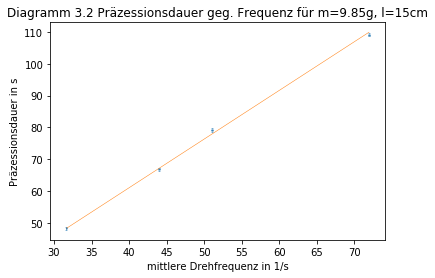

In [9]:
m = 9.85e-3
l = 0.15

g = 9.80984
d_g = 2e-5



popt, pcov = curve_fit(line, m_omega, time)
s = popt[0]
d_s = np.sqrt(pcov[0][0])
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)

print('Steigung s = ', s, ' +- ', d_s )
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)
plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Diagramm 3.2 Präzessionsdauer geg. Frequenz für m=9.85g, l=15cm')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Drehfrequenz in 1/s')
plt.savefig('Diagramm3.2.pdf', format='pdf')

chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("dof ", dof)
print("chi2_red = ", chi2_red)

## Massekonstellation 2 (m=19.7, l=15cm)

In [10]:
omega_A = np.array([660, 422, 360, 260])*np.pi/30
d_omega_A = np.ones(4)*np.pi/20
time = np.array([55.89, 37.56, 31.43, 22.65])
d_time = np.ones(4)*0.5

omega_E = dämpfung(time, d, omega_A)
f1 = np.exp(-d*time)*d_omega_A
f2 = omega_A*time*np.exp(-d*time)*d_d
f3 = omega_A*d*np.exp(-d*time)*d_time
d_omega_E = np.sqrt(f1**2+f2**2+f3**2)
m_omega = 0.5*(omega_A+omega_E)
d_m_omega = 0.5*np.sqrt(d_omega_A**2+d_omega_E**2)

for i in range(len(omega_A)):
    print(omega_A[i], d_omega_A[i], omega_E[i], d_omega_E[i], m_omega[i], d_m_omega[i] )

69.11503837897544 0.15707963267948966 66.60656358338446 0.1619048971704419 67.86080098117995 0.11279096454336975
44.191736660496424 0.15707963267948966 43.10733793199165 0.1556060228526946 43.649537296244034 0.11055230136767473
37.69911184307752 0.15707963267948966 36.92344543920049 0.15521456747346055 37.311278641139005 0.110414642324622
27.227136331111538 0.15707963267948966 26.822255691544722 0.15523929105773945 27.024696011328132 0.11042333142369974


Steigung s =  0.8359963674167508  +-  0.00858976620692082
Trägheitsmoment Iz =  0.003856949310392777  +-  3.962970987874854e-05
chi2 =  7.643590790696782
chi2_red =  2.5478635968989276


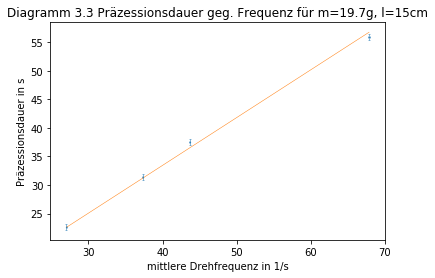

In [11]:
m = 1.97e-2
l = 0.15

g = 9.80984
d_g = 2e-5



popt, pcov = curve_fit(line, m_omega, time)
s = popt[0]
d_s = np.sqrt(pcov[0][0])
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)

print('Steigung s = ', s, ' +- ', d_s )
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)
plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Diagramm 3.3 Präzessionsdauer geg. Frequenz für m=19.7g, l=15cm')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Drehfrequenz in 1/s')
plt.savefig('Diagramm3.3.pdf', format='pdf')

chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

## Massekonstellation 3 (m =9.85g, l=20cm)

In [12]:
omega_A = np.array([670, 468, 318, 254])*np.pi/30
d_omega_A = np.ones(4)*np.pi/20
time = np.array([82.2, 56.95, 38.87, 30.76])
d_time = np.ones(4)*0.5

omega_E = dämpfung(time, d, omega_A)
f1 = np.exp(-d*time)*d_omega_A
f2 = omega_A*time*np.exp(-d*time)*d_d
f3 = omega_A*d*np.exp(-d*time)*d_time
d_omega_E = np.sqrt(f1**2+f2**2+f3**2)
m_omega = 0.5*(omega_A+omega_E)
d_m_omega = 0.5*np.sqrt(d_omega_A**2+d_omega_E**2)

for i in range(len(omega_A)):
    print(omega_A[i], d_omega_A[i], omega_E[i], d_omega_E[i], m_omega[i], d_m_omega[i] )

70.16223593017205 0.15707963267948966 66.44920948066667 0.16932060254208192 68.30572270541936 0.11548103464198903
49.00884539600077 0.15707963267948966 47.197004859733916 0.1568223041231245 48.102925127867344 0.11098113136160709
33.30088212805181 0.15707963267948966 32.45559305188212 0.15451699554041523 32.878237589966965 0.1101697700296684
26.598817800393583 0.15707963267948966 26.06309016124374 0.15457956512509477 26.330953980818663 0.1101917113001096


Steigung s =  1.1928575822310832  +-  0.006893146549558376
Trägheitsmoment Iz =  0.0036689084693828904  +-  2.1201462527540434e-05
chi2 =  4.991325556892535
chi2_red =  1.6637751856308451


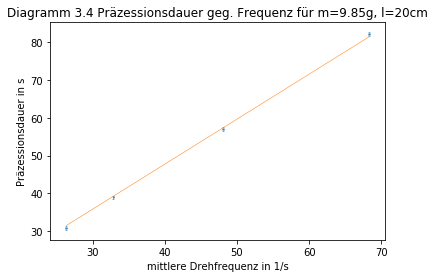

In [13]:
m = 9.85e-3
l = 0.20

g = 9.80984
d_g = 2e-5



popt, pcov = curve_fit(line, m_omega, time)
s = popt[0]
d_s = np.sqrt(pcov[0][0])
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)

print('Steigung s = ', s, ' +- ', d_s )
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)
plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Diagramm 3.4 Präzessionsdauer geg. Frequenz für m=9.85g, l=20cm')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Drehfrequenz in 1/s')
plt.savefig('Diagramm3.4.pdf', format='pdf')
chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

## Massekonstellation 4 (m =19.7g, l=20cm)

In [14]:
omega_A = np.array([575, 490, 302, 258])*np.pi/30
d_omega_A = np.ones(4)*np.pi/20
time = np.array([39.10, 33.28, 20.61, 17.34])
d_time = np.ones(4)*0.5

omega_E = dämpfung(time, d, omega_A)
f1 = np.exp(-d*time)*d_omega_A
f2 = omega_A*time*np.exp(-d*time)*d_d
f3 = omega_A*d*np.exp(-d*time)*d_time
d_omega_E = np.sqrt(f1**2+f2**2+f3**2)
m_omega = 0.5*(omega_A+omega_E)
d_m_omega = 0.5*np.sqrt(d_omega_A**2+d_omega_E**2)

for i in range(len(omega_A)):
    print(omega_A[i], d_omega_A[i], omega_E[i], d_omega_E[i], m_omega[i], d_m_omega[i] )

60.21385919380437 0.15707963267948966 58.67650016090289 0.157718073219453 59.44517967735363 0.11129802516529677
51.312680008633286 0.15707963267948966 50.19544967071541 0.15637518123954006 50.75406483967435 0.11082329212582344
31.62536604613725 0.15707963267948966 31.19715022642632 0.15556577316654815 31.411258136281784 0.11053813910097875
27.01769682087222 0.15707963267948966 26.709580093798188 0.15567918848175916 26.863638457335206 0.11057805018296182


Steigung s =  0.6557413430814022  +-  0.001962711408612969
Trägheitsmoment Iz =  0.0040337673217552645  +-  1.2073545556152523e-05
chi2 =  0.361402611638401
chi2_red =  0.12046753721280033


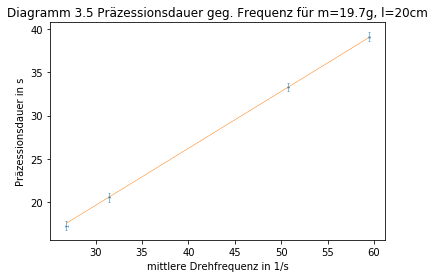

In [15]:
m = 1.97e-2
l = 0.20

g = 9.80984
d_g = 2e-5



popt, pcov = curve_fit(line, m_omega, time)
s = popt[0]
d_s = np.sqrt(pcov[0][0])
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)

print('Steigung s = ', s, ' +- ', d_s )
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)
plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Diagramm 3.5 Präzessionsdauer geg. Frequenz für m=19.7g, l=20cm')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Drehfrequenz in 1/s')
plt.savefig('Diagramm3.5.pdf', format='pdf')
chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

# Aufgabe 4b

In [16]:
Omega = np.array([640, 580, 540, 490, 470, 445, 390, 340, 310, 210])*np.pi/30
d_Omega = np.ones(10)*np.pi/10
omega_f = np.array([695, 621, 587, 530, 510, 480, 426, 370, 338, 243])*np.pi/30
d_omega_f = np.ones(10)*np.pi/10

In [17]:
def line2(x, m, c):
    return m*x+c

Steigung m =  0.9489622988581948  +-  0.009993878358515038
chi2 =  15.297162121728096
chi2_red =  1.912145265216012


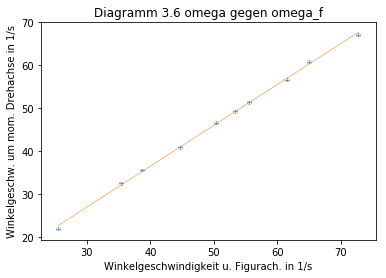

In [18]:
popt, pcov = curve_fit(line2, omega_f, Omega)
s = popt[0]
d_s = np.sqrt(pcov[0][0])

print('Steigung m = ', s, ' +- ', d_s)

chi2_ = np.sum((line2(omega_f, *popt)-Omega)**2/d_Omega**2)
dof = len(omega_f)-2 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

plt.errorbar(omega_f, Omega, yerr=d_Omega, xerr=d_omega_f, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(omega_f, line2(omega_f, *popt), linewidth=0.5)
plt.title('Diagramm 3.6 omega gegen omega_f')
plt.ylabel('Winkelgeschw. um mom. Drehachse in 1/s')
plt.xlabel('Winkelgeschwindigkeit u. Figurach. in 1/s')
plt.savefig('Diagramm3.6.pdf', format='pdf')

# Aufgabe 5

In [19]:
omega_f = np.array([695, 621, 587, 530, 510, 480, 426, 370, 338, 243])*np.pi/30
d_omega_f = np.ones(10)*np.pi/10
omega_n = np.array([640, 580, 540, 490, 470, 445, 390, 340, 310, 210])*np.pi/30
d_omega_n = np.ones(10)*np.pi/10

Steigung m =  0.9489622988581948  +-  0.009993878358515038
chi2 =  15.297162121728096
chi2_red =  1.912145265216012


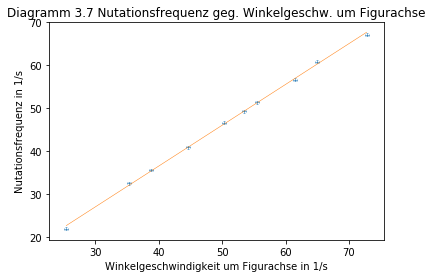

In [20]:
popt, pcov = curve_fit(line2, omega_f, omega_n)
s = popt[0]
d_s = np.sqrt(pcov[0][0])

print('Steigung m = ', s, ' +- ', d_s)

chi2_ = np.sum((line2(omega_f, *popt)-omega_n)**2/d_omega_n**2)
dof = len(omega_f)-2 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

plt.errorbar(omega_f, omega_n, yerr=d_omega_n, xerr=d_omega_f, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(omega_f, line2(omega_f, *popt), linewidth=0.5)
plt.title('Diagramm 3.7 Nutationsfrequenz geg. Winkelgeschw. um Figurachse')
plt.ylabel('Nutationsfrequenz in 1/s')
plt.xlabel('Winkelgeschwindigkeit um Figurachse in 1/s')
plt.savefig('Diagramm3.7.pdf', format='pdf')